<div style="text-align: center"> <h1>Stroke Data Cleaning</h1></div>

This notebook will be used to clean and explore the stroke dataset.

#### Stroke Dataset
Fedesoriano. (2020). Stroke Prediction Dataset. Retrieved August 17, 2023 from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.


## Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pylab as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn


## Read in Data

In [3]:
# Import data
stroke = pd.read_csv("data/healthcare-dataset-stroke-data.csv")


## Initial Data Exploration

In [5]:
# Examine data
print(stroke.head())
print(stroke.info())
print(stroke.describe())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

The code below will print out which variables are numeric and which are categorical.

In [7]:
numerical_vars = []
categorical_vars = []

for column in stroke.columns:
    if pd.api.types.is_numeric_dtype(stroke[column]) and len(stroke[column].unique()) > 2:
        numerical_vars.append(column)
    else:
        categorical_vars.append(column)
        
print("Numerical variables:", numerical_vars)
print("Categorical variables:", categorical_vars)

Numerical variables: ['id', 'age', 'avg_glucose_level', 'bmi']
Categorical variables: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


### Explanation of Features

0. id: unique identifier
1. gender: "Male", "Female" or "Other"
2. age: individual's age
3. hypertension: 1 if the individual has hypertension 0 if not
4. heart_disease: 1 if the individual has heart disease 0 if not
5. ever_married: "No" or "Yes"
6. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
7. bmi: body mass index
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average blood glucose level 
10. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11. stroke: 1 if the individual suffered a stroke and 0 if not


## Data Cleaning

Inspect the data for null values.

In [10]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in stroke.columns:
    string_null = np.array([x in a[2:] for x in stroke[c]])
    print(c, stroke[c].isnull().sum(), string_null.sum()) 

id 0 0
gender 0 0
age 0 0
hypertension 0 0
heart_disease 0 0
ever_married 0 0
work_type 0 0
Residence_type 0 0
avg_glucose_level 0 0
bmi 201 0
smoking_status 0 0
stroke 0 0


Drop entries with NA for BMI

In [12]:
stroke = stroke.dropna()
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Inspect the categorical variables for unusual entries. 

In [14]:
print(stroke['gender'].unique())
print(stroke['ever_married'].unique())
print(stroke['work_type'].unique())
print(stroke['smoking_status'].unique())
print(stroke['Residence_type'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Urban' 'Rural']


There variable gender has male, female and other. 

         id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  


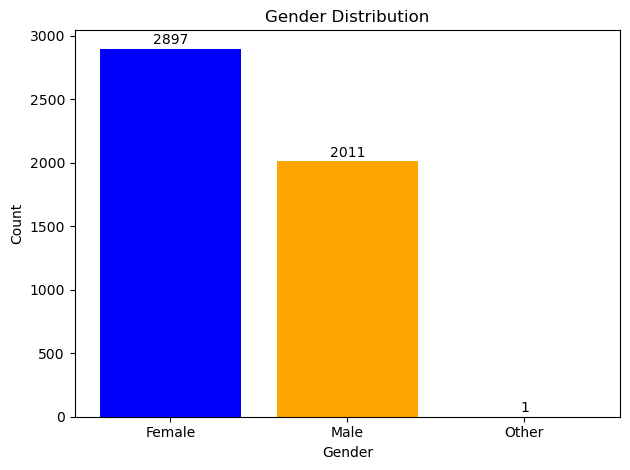

In [16]:
print(stroke[stroke['gender']=='Other'])

# bar plot of gender counts
gender_counts = stroke['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0)

# add count numbers above the bars
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# optional save plot
#plt.savefig('results/Gender Distribution.png', dpi = 100, bbox_inches = 'tight')
plt.show()

There is only one instance of other in the category gender, so it will be dropped.

In [18]:
# drop data
stroke.drop(stroke[stroke['gender']=="Other"].index,inplace=True)
# Check categories of gender variable 
stroke['gender'].value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

The variable smoking_status has a category Unknown.

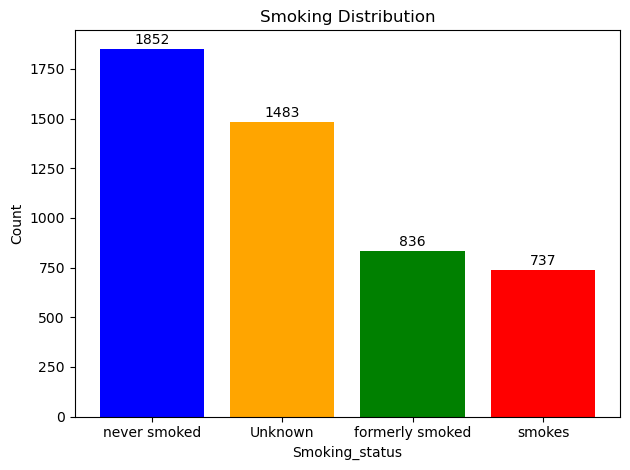

In [20]:
# bar plot of smoking_status counts
smoking_counts = stroke['smoking_status'].value_counts()
plt.bar(smoking_counts.index, smoking_counts.values, color=['blue', 'orange', 'green','red'])
plt.xlabel('Smoking_status')
plt.ylabel('Count')
plt.title('Smoking Distribution')
plt.xticks(rotation=0)

# add count numbers above the bars
for i, count in enumerate(smoking_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# optional save plot
#plt.savefig('results/Smoking Distribution.png', dpi = 100, bbox_inches = 'tight')
plt.show()

'Unknown' entries for smoking status will be dropped.

In [22]:
stroke = stroke[stroke['smoking_status'] != 'Unknown']
print(stroke['smoking_status'].value_counts())

smoking_status
never smoked       1852
formerly smoked     836
smokes              737
Name: count, dtype: int64


Below the category id will be dropped because it is a unique identifier for each individual and does not have any statistical meaning.

In [24]:
stroke = stroke.drop(columns = 'id')
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 321.1+ KB


## Further Data Exploration
For this project stroke will be the response variable. This is a binary variable with 0 indicating a stroke has occured and 1 indicating no stroke has occured. In approximately 5.3 percent of the individuals a stroke has occurred and in approximately 94.7 percent of the individuals there was no indication of a stroke. 

Stroke Count: 180
No Stroke Count: 3245
stroke
0    94.744526
1     5.255474
Name: proportion, dtype: float64


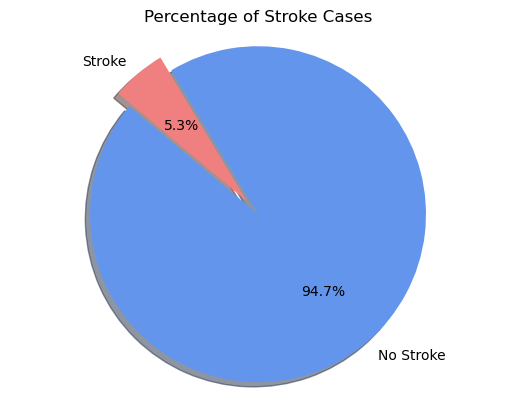

In [26]:
# Calculate the counts for stroke and no stroke
stroke_counts = stroke['stroke'].value_counts()
stroke_count = stroke_counts[1]
no_stroke_count = stroke_counts[0]

print(f"Stroke Count: {stroke_count}")
print(f"No Stroke Count: {no_stroke_count}")
print(stroke['stroke'].value_counts(normalize=True)*100)

# Calculate the percentage of stroke cases
stroke_percentage = (stroke['stroke'].value_counts(normalize=True) * 100).round(2)

# Create a pie chart
labels = ['No Stroke', 'Stroke']
colors = ['cornflowerblue', 'lightcoral']
explode = (0.1, 0) 
plt.pie(stroke_percentage, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Stroke Cases')
plt.axis('equal')
# optional save plot
#plt.savefig('results/stroke_percentage.png', dpi = 100, bbox_inches = 'tight')
plt.show()


### Exploration of Continuous Varaibles

#### Age

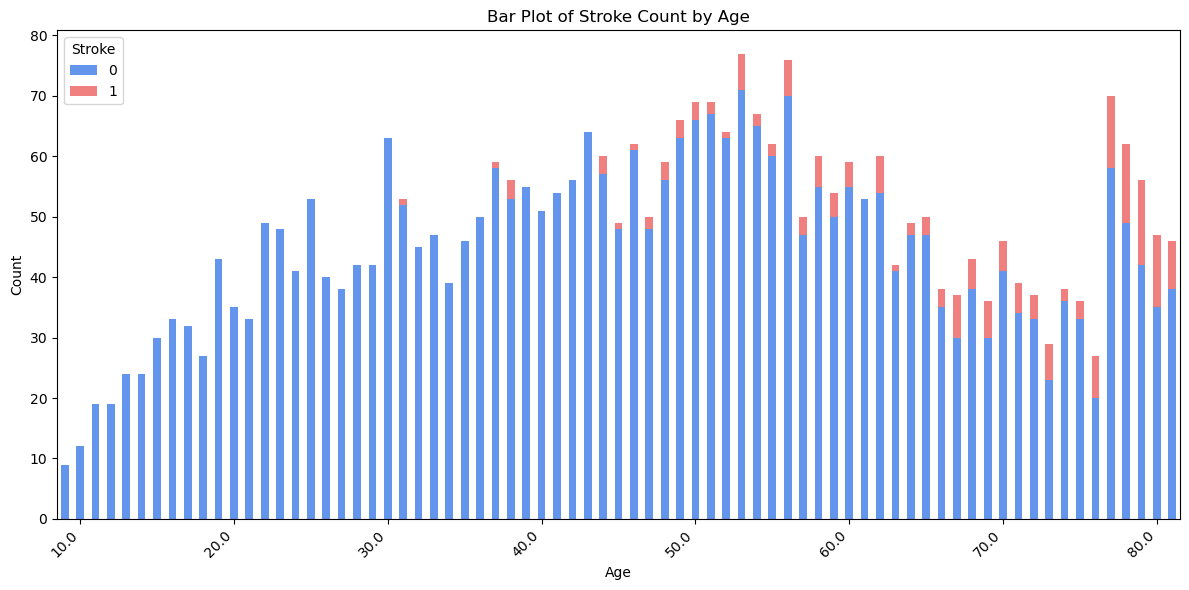

In [28]:
# Group the data by age and stroke, then calculate counts
age_stroke_counts = stroke.groupby(['age', 'stroke']).size().unstack()

# Plot the grouped bar plot 
age_stroke_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['cornflowerblue', 'lightcoral'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of Stroke Count by Age')
plt.legend(title='Stroke')
# Adjust x-axis tick positions and labels
plt.xticks(range(1, len(age_stroke_counts), 10), age_stroke_counts.index[::10], rotation=45, ha="right")

plt.tight_layout()
# optional save plot
#plt.savefig('results/age_stroke_distribution.png', dpi = 100, bbox_inches = 'tight')
plt.show()

### BMI

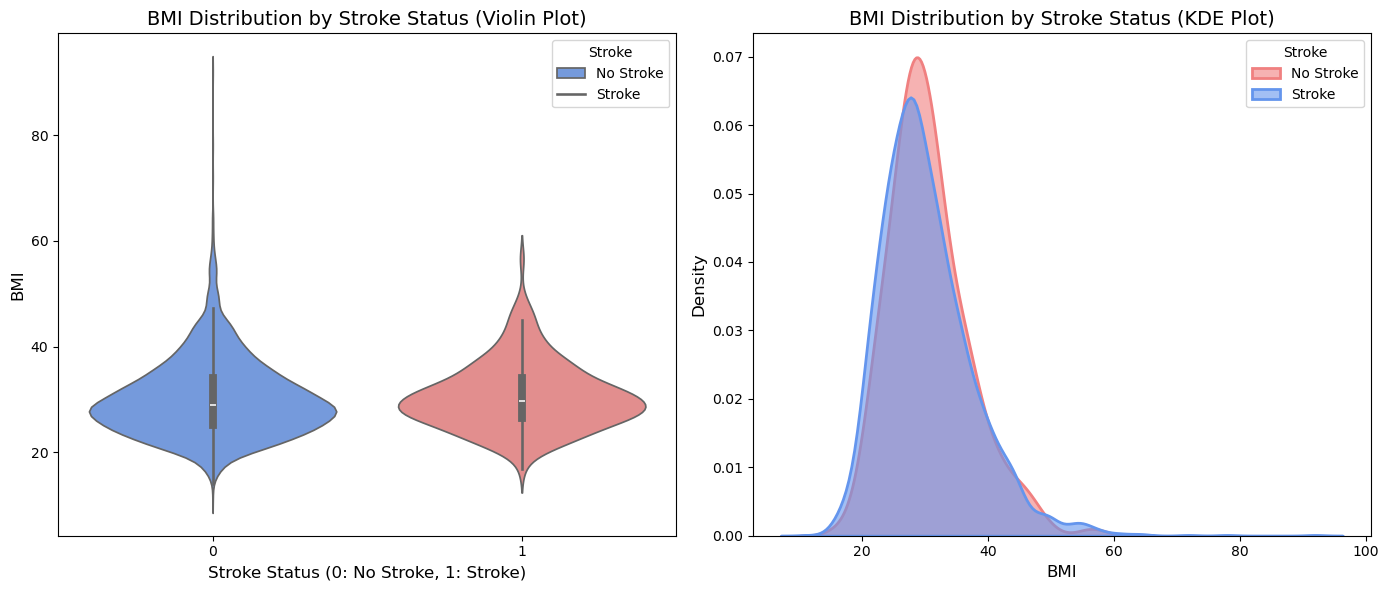

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (14,6))
color_palette = {0: 'cornflowerblue', 1: 'lightcoral'}

# Violin plot
sns.violinplot(data=stroke, x='stroke', hue='stroke', palette=color_palette, y='bmi', ax=axes[0])
axes[0].set_xlabel('Stroke Status (0: No Stroke, 1: Stroke)', fontsize=12)
axes[0].set_ylabel('BMI', fontsize=12)
axes[0].set_title('BMI Distribution by Stroke Status (Violin Plot)', fontsize=14)
axes[0].legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Kernel Density Estimate plot
sns.kdeplot(data=stroke, x='bmi', hue='stroke', fill=True, common_norm=False, ax=axes[1],
            palette=color_palette, alpha=0.6, linewidth=2)
axes[1].set_xlabel('BMI', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12) 
axes[1].set_title('BMI Distribution by Stroke Status (KDE Plot)', fontsize=14)
axes[1].legend(title='Stroke', labels=['No Stroke', 'Stroke'], loc='upper right')
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
# optional save plot
#plt.savefig('results/bmi_stroke_distribution.png', dpi = 100, bbox_inches = 'tight')
plt.show()



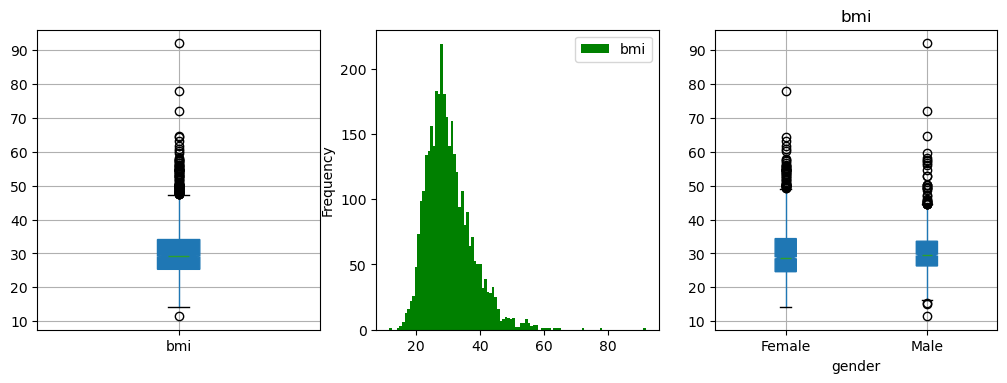

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
stroke.boxplot(column=['bmi'],patch_artist=True, notch=True, ax=axes[0])
plt.title('BMI Boxplot')

stroke.plot(kind="hist", y="bmi", bins=100, color="green", ax=axes[1])

stroke.boxplot(column=['bmi'],patch_artist=True, by='gender', notch=True, ax=axes[2])
plt.suptitle('')
# optional save plot
#plt.savefig('results/bmi_outliers.png', dpi = 100, bbox_inches = 'tight')
plt.show()

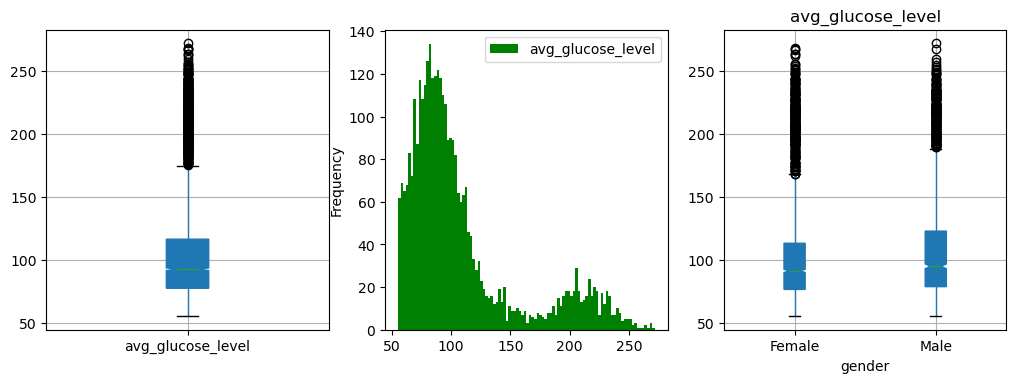

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
stroke.boxplot(column=['avg_glucose_level'], patch_artist=True, notch=True, ax=axes[0])
plt.title('Glucose Level Boxplot')

stroke.plot(kind="hist", y="avg_glucose_level", bins=100, color="green", ax=axes[1])

stroke.boxplot(column=['avg_glucose_level'], patch_artist=True, by='gender', notch=True, ax=axes[2])
plt.suptitle('')
# optional save plot
#plt.savefig('results/glucose_level_outliers.png', dpi = 100, bbox_inches = 'tight')
plt.show()



### Exploration of Categorical Variables

Below is a function that will normalize the categorical variable and plot the percentage of each category that has and has not experienced a stroke. This will help identify variables that may have an increased association with stroke.

In [36]:
# Define a function to create a bar plot with percentages on bars

color_palette = {0: 'cornflowerblue', 1: 'lightcoral'}

def plot_percentage_bar(data, x_col, y_col, xlabel, ylabel, title, save_path=None):
    """
    Function to plot percentage of stroke cases vs non-stroke cases in eacg categorical variable
        save_path: optional, to save uncomment out save_path and set save_path = save_path when calling the function.
    """
    grouped = data.groupby(x_col)[y_col].value_counts(normalize=True).unstack().fillna(0)
    colors = [color_palette[col] for col in grouped.columns]
    ax = grouped.plot(kind='bar', stacked=True, color = colors)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    for container in ax.containers:
        for p in container.patches:
            total = p.get_height()
            if p.get_y() < 0:  # If the bar is for 'stroke' category
                ax.annotate(f'{total*100:.1f}%', 
                            (p.get_x() + p.get_width() / 2., p.get_y() + total), 
                            ha='center', va='bottom', fontsize=8, color='black')
            else:  # If the bar is for 'no stroke' category
                ax.annotate(f'{total*100:.1f}%', 
                            (p.get_x() + p.get_width() / 2., p.get_y()), 
                            ha='center', va='bottom', fontsize=8, color='black')

    plt.xticks(rotation=0)
    plt.legend(title=y_col)
    plt.tight_layout()

    if save_path: 
        plt.savefig(save_path, dpi = 150, bbox_inches = 'tight')
    plt.show()


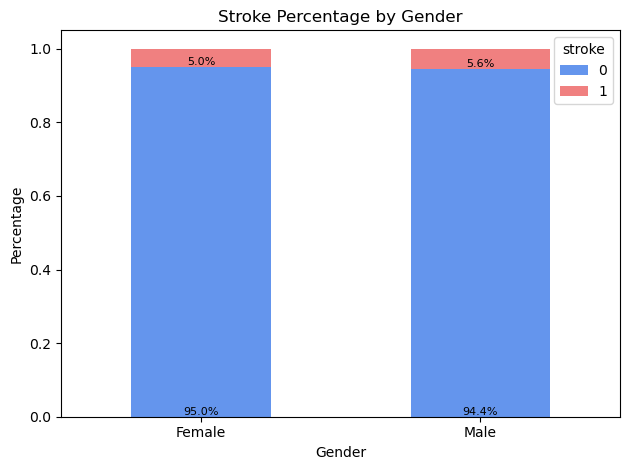

In [38]:
# Gender and Stroke Percentage
#save_path = 'results/stroke_by_gender.png'
plot_percentage_bar(stroke, 'gender', 'stroke', 'Gender', 'Percentage', 'Stroke Percentage by Gender', save_path=None)


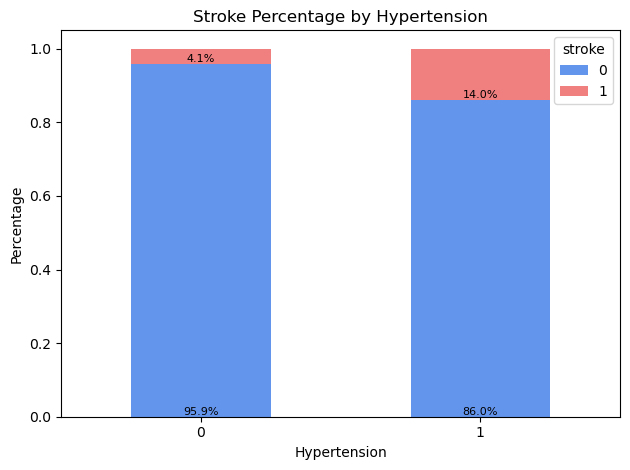

In [40]:
# Hypertension and Stroke Percentage
#save_path = 'results/stroke_by_hypertension.png'
plot_percentage_bar(stroke, 'hypertension', 'stroke', 'Hypertension', 'Percentage', 'Stroke Percentage by Hypertension', save_path=None)

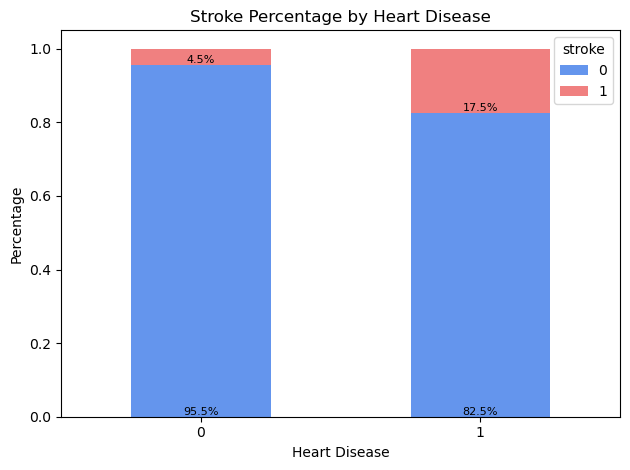

In [44]:
# Heart Disease and Stroke Percentage
#save_path = 'results/stroke_by_heartdisease'
plot_percentage_bar(stroke, 'heart_disease', 'stroke', 'Heart Disease', 'Percentage', 'Stroke Percentage by Heart Disease', save_path=None)

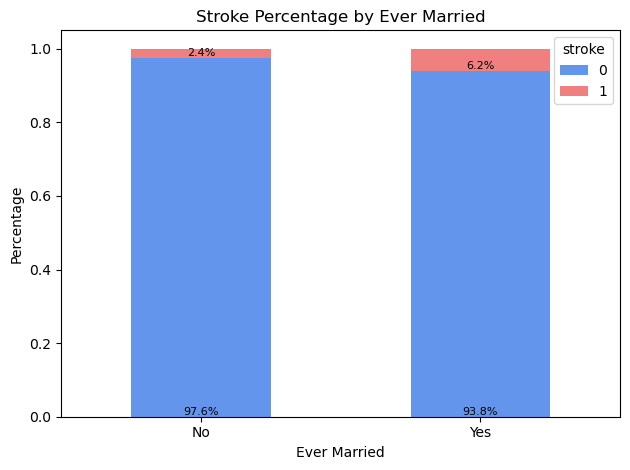

In [48]:
# Ever Married and Stroke Percentage
#save_path = 'results/stroke_by_marriage'
plot_percentage_bar(stroke, 'ever_married', 'stroke', 'Ever Married', 'Percentage', 'Stroke Percentage by Ever Married', save_path=None)

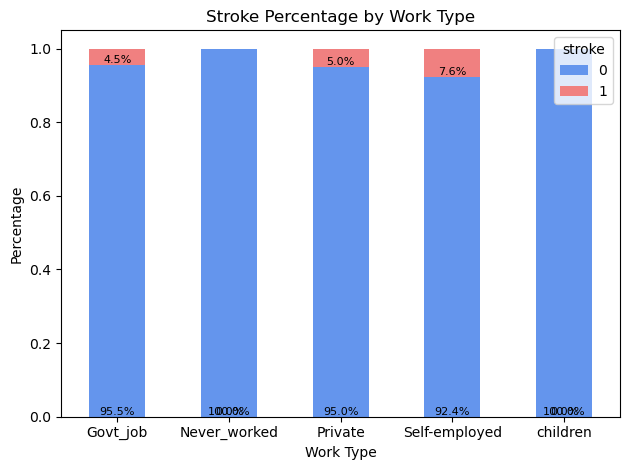

In [50]:
# Work Type and Stroke Percentage
#save_path = 'results/stroke_by_worktype'
plot_percentage_bar(stroke, 'work_type', 'stroke', 'Work Type', 'Percentage', 'Stroke Percentage by Work Type', save_path=None)

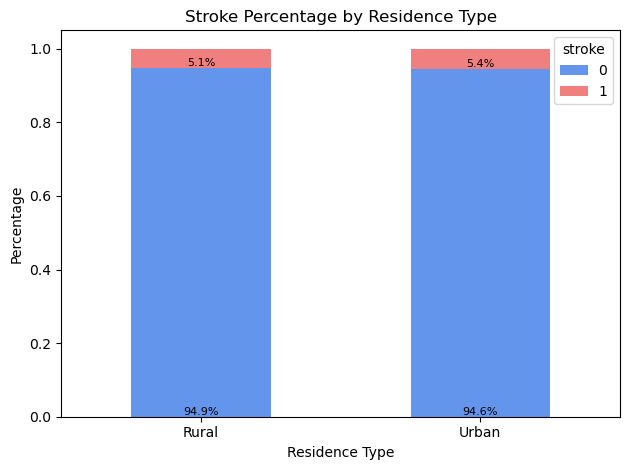

In [52]:
# Residence Type and Stroke Percentage
# save_path = 'results/stroke_by_residence
plot_percentage_bar(stroke, 'Residence_type', 'stroke', 'Residence Type', 'Percentage', 'Stroke Percentage by Residence Type', save_path=None)

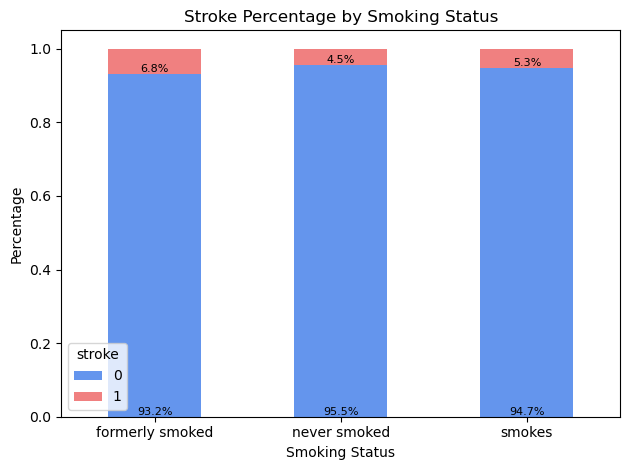

In [54]:
# Smoking Status and Stroke Percentage
#save_path = 'results/stroke_by_smoking'
plot_percentage_bar(stroke, 'smoking_status', 'stroke', 'Smoking Status', 'Percentage', 'Stroke Percentage by Smoking Status', save_path=None)


In [56]:
# Convert categorical variables to dummy variables 
stroke = pd.get_dummies(stroke, drop_first=True)
stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,False,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,True,False
5,81.0,0,0,186.21,29.0,1,True,True,False,True,False,False,True,False,False


In [58]:
# Convert 'True' and 'False' enties to numeric '1' and '0'
bool_cols = ['gender_Male', 'ever_married_Yes', 'work_type_Never_worked', 
             'work_type_Private', 'work_type_Self-employed', 'work_type_children', 
             'Residence_type_Urban','smoking_status_never smoked', 'smoking_status_smokes']

stroke[bool_cols] = stroke[bool_cols].astype(int)

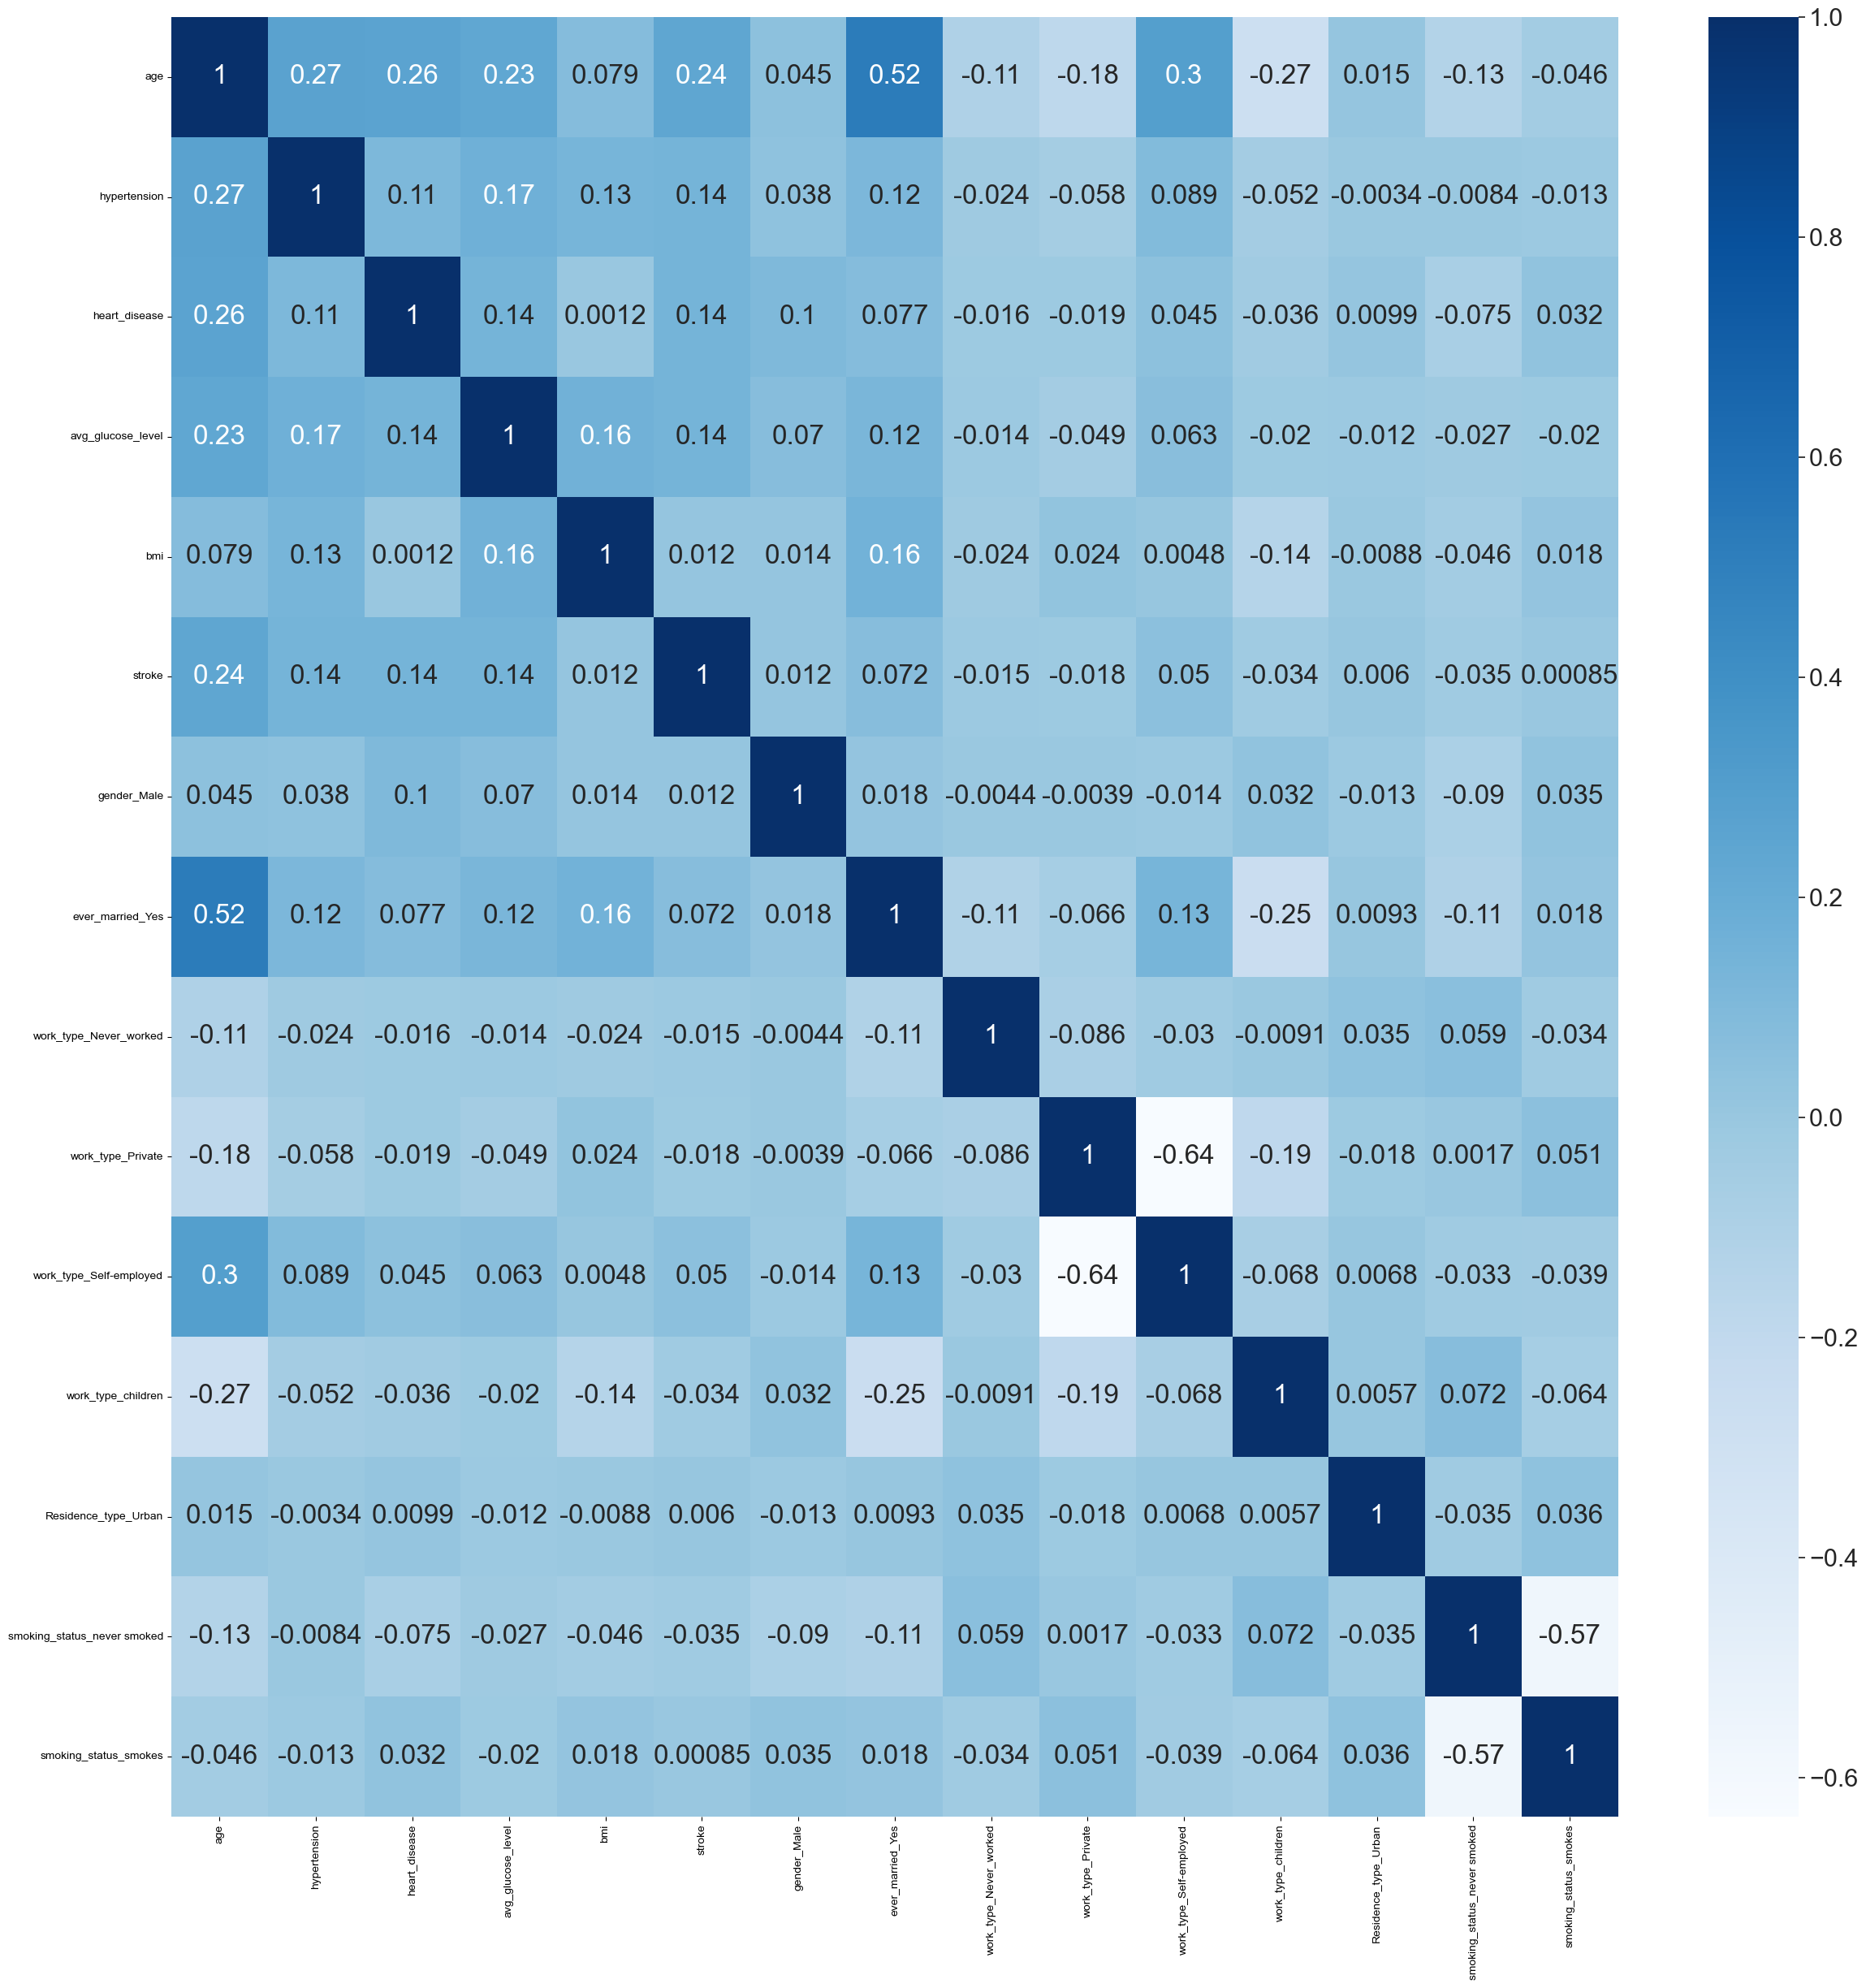

In [60]:
# correlation matrix plot
corr_matrix = stroke.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.set(font_scale=2)
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.tight_layout()
# optional save plot
#plt.savefig('results/correlation_matrix.png', dpi = 300, bbox_inches = 'tight')
plt.show()

The cleaned data will be exported as a csv and a different notebook will be used for analysis.

In [ ]:
stroke_clean = stroke
# uncomment out to save
#stroke_clean.to_csv("data/stroke_clean.csv", index=False)